# Implementación de una Red Neuronal Densa

## Paqueterías que vamos a utilizar

<img src="https://techscript24.com/wp-content/uploads/2020/10/86498201-a8bd8680-bd39-11ea-9d08-66b610a8dc01.png" width="50%">

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5ufeQEq94DZpcunTim55puXY6dNookrlRwmiOd1PQFraMl3sjijiYwIDw1j1hfzo2h6c&usqp=CAU" width="50%">

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwDfwjwyxZsRFpjoPFjlsNnKk3J58Gh3bjAap7Td81dyrYSt1XbtZI7lsgartOMjBqM60&usqp=CAU" width="50%">


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils

import matplotlib.pyplot as plt
import numpy as np

## Importamos los datos

Usaremos un conocido dataset de imágenes de cifras escritas a mano llamado [MNIST](http://yann.lecun.com/exdb/mnist/), el cual es considerado el "Hello World" del deep learning.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png" width="90%">



MNIST consta de 60000 imágenes de 28x28 pixeles en escala de grises [0..255]. Para cargar estas imágenes, tenemos una función dentro de Keras llamada `mnist.load_data()`. El cual nos separa la data entre los datos de entrenamiento y los datos de test.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Veamos un poco el dataset MNIST.

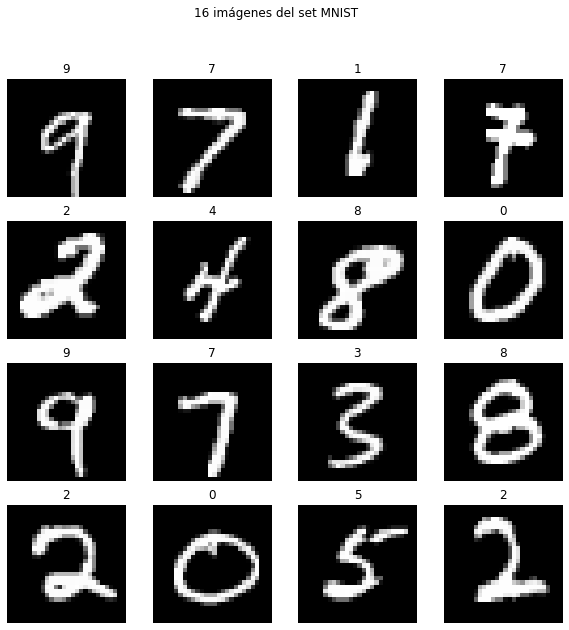

In [ ]:
ids_imgs = np.random.randint(0,x_train.shape[0],16)
plt.figure(figsize=(10,10))
for i in range(len(ids_imgs)):
	img = x_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()

## Preparamos los datos

Vamos a redimensionar las imágenes en tensores de una sola dimensión.
De igual manera, debemos normalizar el rango de valores de los pixeles de [0, 255] a [0, 1].

In [ ]:
X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

Ahora convertimos las categorías de los dígitos de 0 a 9 en un one-hot encoded binary vector. Hacemos esto porque será lo que le pasemos a la red neuronal como las categorías de las muestras tanto de entrenamiento como de test.

In [ ]:
nclasses = 10
Y_train = utils.to_categorical(y_train,nclasses)
Y_test = utils.to_categorical(y_test,nclasses)

In [ ]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Definición del modelo

In [ ]:
np.random.seed(1)		
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

modelo = Sequential()
modelo.add( Dense(15, input_dim=input_dim, activation='relu'))
modelo.add( Dense(output_dim, activation='softmax'))
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
sgd = SGD(lr=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Entrenamos al modelo

Hiperparàmetros que empezamos a configurar:

*  Epocas (num_epochs): Número de veces que el modelo pasa sobre todas las imágenes del set de entrenamiento.
*  Batch Size (batch_size): Número de imágenes procesadas a la vez.

In [ ]:
num_epochs = 50
batch_size = 1024
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/50
59/59 - 3s - loss: 0.9650 - accuracy: 0.7423
Epoch 2/50
59/59 - 0s - loss: 0.4409 - accuracy: 0.8765
Epoch 3/50
59/59 - 0s - loss: 0.3728 - accuracy: 0.8935
Epoch 4/50
59/59 - 0s - loss: 0.3407 - accuracy: 0.9032
Epoch 5/50
59/59 - 0s - loss: 0.3206 - accuracy: 0.9086
Epoch 6/50
59/59 - 0s - loss: 0.3066 - accuracy: 0.9123
Epoch 7/50
59/59 - 0s - loss: 0.2951 - accuracy: 0.9156
Epoch 8/50
59/59 - 0s - loss: 0.2860 - accuracy: 0.9178
Epoch 9/50
59/59 - 0s - loss: 0.2783 - accuracy: 0.9199
Epoch 10/50
59/59 - 0s - loss: 0.2710 - accuracy: 0.9218
Epoch 11/50
59/59 - 0s - loss: 0.2645 - accuracy: 0.9244
Epoch 12/50
59/59 - 0s - loss: 0.2584 - accuracy: 0.9260
Epoch 13/50
59/59 - 0s - loss: 0.2531 - accuracy: 0.9275
Epoch 14/50
59/59 - 0s - loss: 0.2478 - accuracy: 0.9292
Epoch 15/50
59/59 - 0s - loss: 0.2428 - accuracy: 0.9303
Epoch 16/50
59/59 - 0s - loss: 0.2378 - accuracy: 0.9311
Epoch 17/50
59/59 - 0s - loss: 0.2329 - accuracy: 0.9330
Epoch 18/50
59/59 - 0s - loss: 0.2291 - 

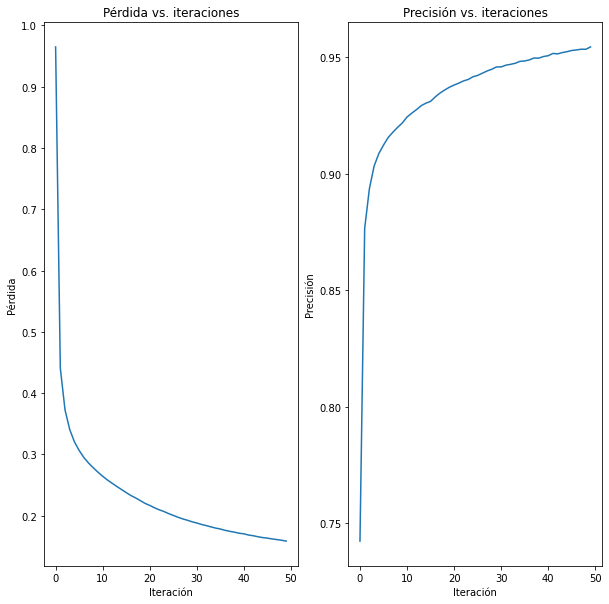

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

plt.show()


## Precisión del modelo con el dataset de test

In [ ]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Precisión en el set de validación: 94.8%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


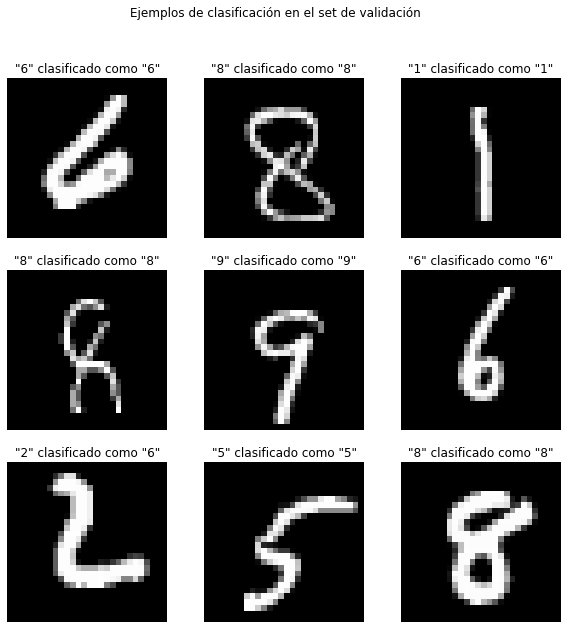

In [ ]:
Y_pred = modelo.predict_classes(X_test)

plt.figure(figsize=(10,10))

ids_imgs = np.random.randint(0,X_test.shape[0],9)
for i in range(len(ids_imgs)):
	idx = ids_imgs[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = Y_pred[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()